# Data challenge 2

There is a large dataset containing geographical information about points of sale for products, for thousands of customers and thousands of products. The original dataset was in the form of 3 tables:

    supermarket_distances: three columns. The first column is the customer id, the second is the shop id and the third is the distance between the customer’s house and the shop location. The distance is a calculated in meters as a straight line so it does not take into account the road graph.
    supermarket_prices: two columns. The first column is the product id and the second column is its unit price. The price is in Euro and it is calculated as the average unit price for the time span of the dataset.
    supermarket_purchases: four columns. The first column is the customer id, the second is the product id, the third is the shop id and the fourth is the total amount of items that the customer bought the product in that particular shop. The data is recorded from January 2007 to December 2011.


For ease of analysis, today we will be working with an aggregated version of the dataset.  The data is aggregated by customer, and info from different shops are pivoted to new columns.  We've added this file (csv format) to the "Data Challenges" Dropbox folder.

We'd like you to tell us if you see anything interesting (and at best, actionable) in this dataset.  Please use an iPython notebook to show off your analysis.  As was discussed last week, you should annotate heavily and make the notebook look nice.  It is, in essence, a summary report of the work you have done.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

First read in and examine the data:

In [3]:
data = pd.read_csv('supermarket_data_aggr.csv',sep=',')

In [4]:
data

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.52220,3090,473,7551.7010,14.221659,3.150493,2,...,10.441143,14.862848,0.000000,0.000000,0.000000,6.393403,2.600485,0.000000,0.000000,0.000000
1,2,909.76764,254.94832,2295.48400,4508,486,7820.2190,11.235947,2.191422,4,...,3.761943,4.848720,2.546600,0.000000,16.479185,2.851152,2.009863,2.059450,0.000000,2.103394
2,3,1498.94700,754.29560,2831.77270,814,234,1788.6130,5.453088,2.258994,4,...,3.757062,5.605183,1.923385,0.000000,5.924268,3.426687,2.478529,1.923385,0.000000,1.947067
3,4,561.65900,362.79178,2210.38200,648,208,1679.5200,5.976940,2.614292,4,...,4.997400,2.688400,5.029184,0.000000,7.156351,4.997400,2.688400,2.083168,0.000000,2.754427
4,5,605.36280,275.46753,1375.11840,13,10,17.9220,1.792200,1.692000,2,...,0.000000,0.967667,2.145571,0.000000,0.000000,0.000000,0.633667,2.145571,0.000000,0.000000
5,6,2603.69560,1972.48940,3697.23000,2783,620,6346.3850,7.059382,2.785088,4,...,6.279324,8.044698,2.704978,0.000000,1.984538,3.349176,2.525061,2.082261,0.000000,1.914615
6,7,2068.84280,2068.84280,2068.84280,20,19,47.1570,2.481947,2.355105,1,...,2.481947,0.000000,0.000000,0.000000,0.000000,2.355105,0.000000,0.000000,0.000000,0.000000
7,8,1399.30570,245.44533,1679.82470,2601,322,6939.3570,18.071241,2.983021,3,...,5.278389,22.527120,3.600365,0.000000,0.000000,5.227889,2.965092,2.507716,0.000000,0.000000
8,9,1789.29030,164.82315,3199.93870,7977,743,17245.0620,15.777733,3.072187,2,...,12.876366,19.118874,0.000000,0.000000,0.000000,3.339414,2.764455,0.000000,0.000000,0.000000
9,10,1940.03210,968.77356,2437.86910,3810,552,8434.0100,11.553438,2.552993,3,...,3.940031,14.952691,0.334000,0.000000,0.000000,2.632964,2.521915,0.334000,0.000000,0.000000


In [8]:
data.shape


(60366, 40)

In [113]:
data.columns
data.describe()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
count,60366.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,...,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000
mean,30183.500000,2030.227290,1396.438077,2942.667579,1778.712383,330.668185,4235.493251,8.532106,3.666521,2.380055,...,8.099084,4.974362,1.520414,0.757002,0.808136,4.681516,2.297958,0.760319,0.444549,0.453596
std,17426.307512,1119.909710,1048.415728,1327.528871,2185.051073,236.004343,5006.777082,10.315527,9.133248,1.012191,...,16.535203,11.230346,3.687745,4.902861,2.603233,15.956085,9.966453,1.897947,4.385982,1.325875
min,1.000000,6.642472,6.642472,6.642472,1.000000,1.000000,0.212000,0.212000,0.212000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15092.250000,1250.239000,573.610700,2117.183000,227.000000,127.000000,653.107000,4.532897,2.533746,2.000000,...,3.852688,0.000000,0.000000,0.000000,0.000000,2.647570,0.000000,0.000000,0.000000,0.000000
50%,30183.500000,1936.880200,1184.943000,2869.195300,925.000000,304.000000,2355.138000,6.862780,2.944260,2.000000,...,6.048320,3.209491,0.000000,0.000000,0.000000,3.251844,2.296758,0.000000,0.000000,0.000000
75%,45274.750000,2569.706800,1962.384500,3580.669700,2552.000000,500.000000,6054.631000,10.429567,3.558136,3.000000,...,9.407107,5.978663,2.107243,0.000000,0.000000,4.166946,2.717513,1.840338,0.000000,0.000000
max,60366.000000,9004.164000,9004.164000,9267.698000,22131.000000,1465.000000,51588.656000,787.569000,787.569000,5.000000,...,787.569000,787.569000,263.234000,522.607000,133.967250,787.569000,787.569000,263.234000,522.607000,133.967250


The data are aggregated by customer, and it looks like the first ten columns are contain unique features. The rest of the columns that follow are organized into distances to each shop (cols 11-15), products purchased from each shop (cols 16-20), unique products purchased from each shop (cols 21-25), amount purchased from each shop (cols 26-30), average purchase from each shop (col 31-35), average price per shop (cols 36-40).

A lot of valuable information is available here. I will start exploring the first ten columns and make a data frame containing only that subset.

In [41]:
df = pd.DataFrame({'customer_id':data.customer_id, 'avg_distance_to_shops':data.avg_distance_to_shops, 'min_distance_to_shops':data.min_distance_to_shops, 'max_distance_to_shops':data.max_distance_to_shops, 'products_purchased':data.products_purchased, 'amount_purchased':data.amount_purchased, 'avg_purchase':data.avg_purchase, 'avg_price':data.avg_price, 'shops_used':data.shops_used})

In [42]:
df.columns

Index([u'amount_purchased', u'avg_distance_to_shops', u'avg_price',
       u'avg_purchase', u'customer_id', u'max_distance_to_shops',
       u'min_distance_to_shops', u'products_purchased', u'shops_used'],
      dtype='object')

In [43]:
df

,amount_purchased,avg_distance_to_shops,avg_price,avg_purchase,customer_id,max_distance_to_shops,min_distance_to_shops,products_purchased,shops_used
0,7551.7010,1434.91910,3.150493,14.221659,1,4082.52220,985.87620,3090,2
1,7820.2190,909.76764,2.191422,11.235947,2,2295.48400,254.94832,4508,4
2,1788.6130,1498.94700,2.258994,5.453088,3,2831.77270,754.29560,814,4
3,1679.5200,561.65900,2.614292,5.976940,4,2210.38200,362.79178,648,4
4,17.9220,605.36280,1.692000,1.792200,5,1375.11840,275.46753,13,2
5,6346.3850,2603.69560,2.785088,7.059382,6,3697.23000,1972.48940,2783,4
6,47.1570,2068.84280,2.355105,2.481947,7,2068.84280,2068.84280,20,1
7,6939.3570,1399.30570,2.983021,18.071241,8,1679.82470,245.44533,2601,3
8,17245.0620,1789.29030,3.072187,15.777733,9,3199.93870,164.82315,7977,2
9,8434.0100,1940.03210,2.552993,11.553438,10,2437.86910,968.77356,3810,3


Awesome, this looks really nice! By eyeball it looks like all data are labeled, present, and numerical - no NaNs that I can see but I should check.

In [44]:
test = df.isnull()

In [45]:
np.where(test != False)

(array([44616, 44616, 44616, 44616, 44616, 44616, 44616, 44616]),
 array([0, 1, 2, 3, 5, 6, 7, 8]))

In [46]:
df.columns

Index([u'amount_purchased', u'avg_distance_to_shops', u'avg_price',
       u'avg_purchase', u'customer_id', u'max_distance_to_shops',
       u'min_distance_to_shops', u'products_purchased', u'shops_used'],
      dtype='object')

In [47]:
df.shops_used[44616]

nan

In [48]:
clean_df = df.dropna()
clean_df
len(clean_df), len(df)

(60365, 60366)

Cool! I located and removed the one row containing nan! Now I will explore these data!

In [37]:
clean_df.describe()

,amount_purchased,avg_distance_to_shops,avg_price,avg_purchase,customer_id,max_distance_to_shops,min_distance_to_shops,products_purchased,shops_used
count,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000
mean,4235.493251,2030.227290,3.666521,8.532106,30183.260896,2942.667579,1396.438077,1778.712383,2.380055
std,5006.777082,1119.909710,9.133248,10.315527,17426.352832,1327.528871,1048.415728,2185.051073,1.012191
min,0.212000,6.642472,0.212000,0.212000,1.000000,6.642472,6.642472,1.000000,1.000000
25%,653.107000,1250.239000,2.533746,4.532897,15092.000000,2117.183000,573.610700,227.000000,2.000000
50%,2355.138000,1936.880200,2.944260,6.862780,30183.000000,2869.195300,1184.943000,925.000000,2.000000
75%,6054.631000,2569.706800,3.558136,10.429567,45275.000000,3580.669700,1962.384500,2552.000000,3.000000
max,51588.656000,9004.164000,787.569000,787.569000,60366.000000,9267.698000,9004.164000,22131.000000,5.000000


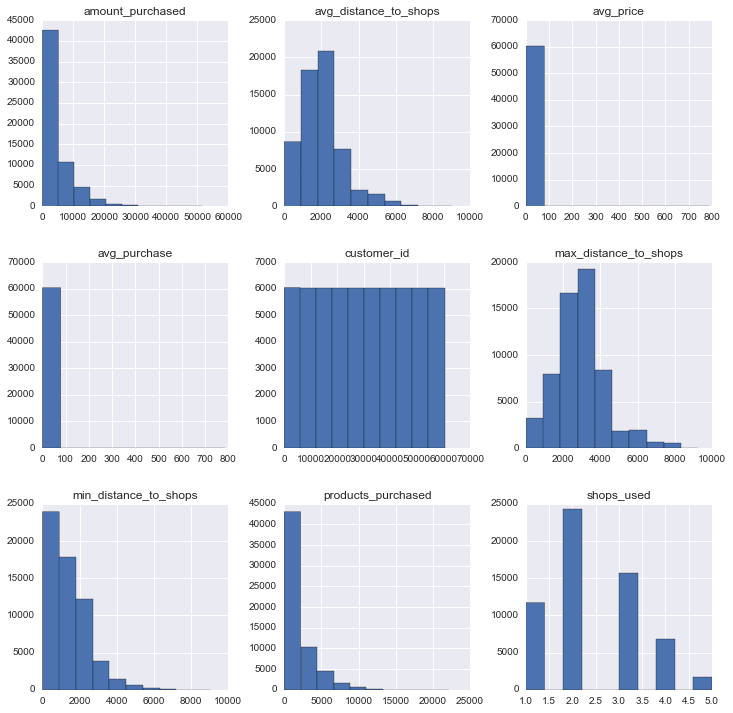

In [40]:
%matplotlib inline
clean_df.hist(figsize=(12,12))
plt.show()

What questions to ask of this dataset? Interesting features might be shops_used, min_distance_to_shops, max_distance_to_shops, amount_purchased, ave_price, and products_purchased. I'm not sure how helpful the average distance to shops, and average purchase will be and the customer ID is just a label. That leaves me with six features to explore for now.

These data are plentiful (60365 entries) and labeled. Do we want to make a prediction? It might be interesting to look at:

1. the min/max distances to shops and the number of products purchased

2. min/max distances to shops and the number of shops used

3. products purchased and average price

4. customers spending the most money

5. which shops are making the most money?

In [115]:
clean_df.columns
cust = pd.DataFrame({'customer_id':clean_df.customer_id,amount_purchased':clean.df.amount_purchased, 'avg_price':clean_df.avg_price, min_distance_to_shops':clean_df.min_distance_to_shops

Index([u'amount_purchased', u'avg_distance_to_shops', u'avg_price',
       u'avg_purchase', u'customer_id', u'max_distance_to_shops',
       u'min_distance_to_shops', u'products_purchased', u'shops_used'],
      dtype='object')

I think first it would be a good idea to compare these features among shops, which is easily done by making barcharts from the data contained in columns 11-40.

This time I'll clean the entire data set to remove any nan.

In [50]:
all_clean_data = data.dropna()
all_clean_data
len(all_clean_data), len(data)
data.columns

Index([u'customer_id', u'avg_distance_to_shops', u'min_distance_to_shops',
       u'max_distance_to_shops', u'products_purchased',
       u'unique_products_purchased', u'amount_purchased', u'avg_purchase',
       u'avg_price', u'shops_used', u'distance_shop_1', u'distance_shop_2',
       u'distance_shop_3', u'distance_shop_4', u'distance_shop_5',
       u'products_purchased_shop_1', u'products_purchased_shop_2',
       u'products_purchased_shop_3', u'products_purchased_shop_4',
       u'products_purchased_shop_5', u'unique_products_purchased_shop_1',
       u'unique_products_purchased_shop_2',
       u'unique_products_purchased_shop_3',
       u'unique_products_purchased_shop_4',
       u'unique_products_purchased_shop_5', u'amount_purchased_shop_1',
       u'amount_purchased_shop_2', u'amount_purchased_shop_3',
       u'amount_purchased_shop_4', u'amount_purchased_shop_5',
       u'avg_purchase_shop_1', u'avg_purchase_shop_2', u'avg_purchase_shop_3',
       u'avg_purchase_shop_4', u'a

Great! Now explore! As a reminder:

    distances to each shop (cols 11-15)
    products purchased from each shop (cols 16-20)
    unique products purchased from each shop (cols 21-25)
    amount purchased from each shop (cols 26-30)
    average purchase from each shop (col 31-35)
    average price per shop (cols 36-40)

In [52]:
shop_dist = pd.DataFrame({'distance_shop_1':all_clean_data.distance_shop_1, 'distance_shop_2':all_clean_data.distance_shop_2, 'distance_shop_3':all_clean_data.distance_shop_3, 'distance_shop_4':all_clean_data.distance_shop_4, 'distance_shop_5':all_clean_data.distance_shop_5})

In [60]:
shop_dist.describe()

#shop_dist.plot(kind='barh', figsize=(12,12))
#plt.show()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5
count,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000
mean,2496.648716,2488.206347,1924.958025,2882.830827,2020.901830
std,1281.530667,1417.347090,1157.755921,1730.091681,1260.860427
min,93.283410,11.190418,17.844347,6.642472,25.460707
25%,1609.575400,1501.897300,1253.801300,1532.684700,1173.405600
50%,2288.674600,2355.401900,1746.169100,2704.323000,1852.926400
75%,3144.061500,3370.679000,2323.556200,4055.997300,2466.560000
max,8019.920400,9004.164000,7395.245600,9273.686000,7465.806600


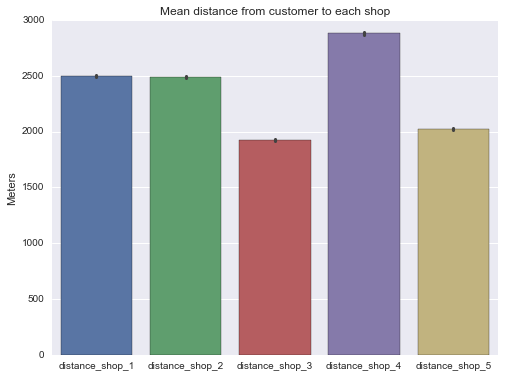

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=shop_dist)
ax.set(ylabel="Meters")
sns.plt.title('Mean distance from customer to each shop')
plt.show()

In [100]:
prod_purch = pd.DataFrame({'prod_purch_shop1':all_clean_data.products_purchased_shop_1,'prod_purch_shop2':all_clean_data.products_purchased_shop_2, 'prod_purch_shop3':all_clean_data.products_purchased_shop_3, 'prod_purch_shop4':all_clean_data.products_purchased_shop_4, 'prod_purch_shop5':all_clean_data.products_purchased_shop_5}) 
prod_purch.describe()

,prod_purch_shop1,prod_purch_shop2,prod_purch_shop3,prod_purch_shop4,prod_purch_shop5
count,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000
mean,887.828046,605.375168,156.677860,56.647743,72.183567
std,1438.491631,1382.151170,723.825748,455.101501,504.959419
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,0.000000,0.000000
50%,292.000000,53.000000,0.000000,0.000000,0.000000
75%,1072.000000,471.000000,10.000000,0.000000,0.000000
max,17016.000000,22110.000000,16913.000000,17445.000000,20891.000000


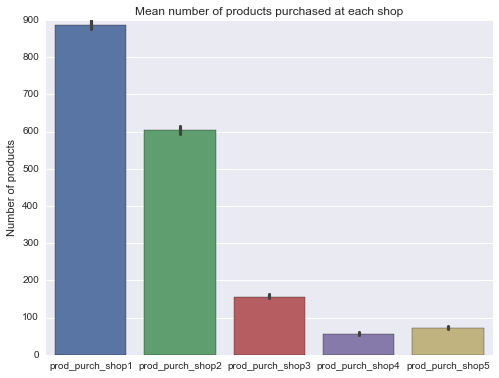

In [101]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=prod_purch)
ax.set(ylabel="Number of products")
sns.plt.title('Mean number of products purchased at each shop')
plt.show()

In [98]:
unique_prod_purch = pd.DataFrame({'uniq_prod_shop1':all_clean_data.unique_products_purchased_shop_1,'uniq_prod_shop2':all_clean_data.unique_products_purchased_shop_2, 'uniq_prod_shop3':all_clean_data.unique_products_purchased_shop_3, 'uniq_prod_shop4':all_clean_data.unique_products_purchased_shop_4, 'uniq_prod_shop5':all_clean_data.unique_products_purchased_shop_5})

In [102]:
unique_prod_purch.describe()

,uniq_prod_shop1,uniq_prod_shop2,uniq_prod_shop3,uniq_prod_shop4,uniq_prod_shop5
count,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000
mean,222.303056,126.613452,31.908623,11.568823,15.768475
std,213.982579,172.330575,88.530774,52.257955,61.933273
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000
50%,160.000000,42.000000,0.000000,0.000000,0.000000
75%,355.000000,198.000000,10.000000,0.000000,0.000000
max,1459.000000,1161.000000,1048.000000,846.000000,841.000000


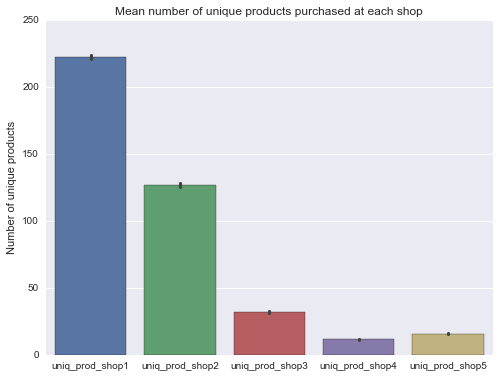

In [103]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=unique_prod_purch)
ax.set(ylabel="Number of unique products")
sns.plt.title('Mean number of unique products purchased at each shop')
plt.show()

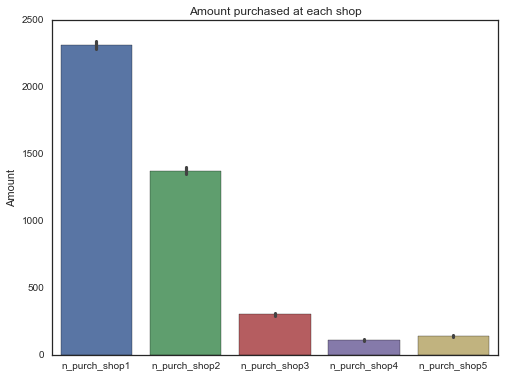

In [162]:
amount_purchased = pd.DataFrame({'n_purch_shop1':all_clean_data.amount_purchased_shop_1, 'n_purch_shop2':all_clean_data.amount_purchased_shop_2, 'n_purch_shop3':all_clean_data.amount_purchased_shop_3, 'n_purch_shop4':all_clean_data.amount_purchased_shop_4, 'n_purch_shop5':all_clean_data.amount_purchased_shop_5})
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=amount_purchased)
ax.set(ylabel="Amount")
sns.plt.title('Amount purchased at each shop')
plt.show()

In [110]:
ave_price = pd.DataFrame({'price_shop1':all_clean_data.avg_price_shop_1, 'price_shop2':all_clean_data.avg_price_shop_2, 'price_shop3':all_clean_data.avg_price_shop_3, 'price_shop4':all_clean_data.avg_price_shop_4, 'price_shop5':all_clean_data.avg_price_shop_5})
ave_price.describe()


,price_shop1,price_shop2,price_shop3,price_shop4,price_shop5
count,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000
mean,4.681594,2.297996,0.760332,0.444556,0.453603
std,15.956206,9.966532,1.897961,4.386018,1.325884
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.647582,0.000000,0.000000,0.000000,0.000000
50%,3.251849,2.296768,0.000000,0.000000,0.000000
75%,4.166951,2.717514,1.840343,0.000000,0.000000
max,787.569000,787.569000,263.234000,522.607000,133.967250


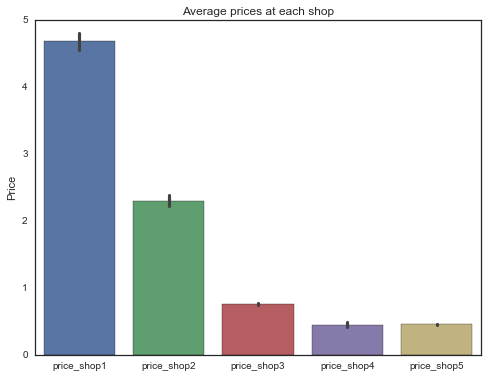

In [183]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=ave_price)
ax.set(ylabel="Price")
sns.plt.title('Average prices at each shop')
plt.show()

In general Shop1 has the highest prices, and highest number of products purchased. Shop4 is the farthest from customers homes, and though they have low prices, they are have the lowest number of purchases - they may be suffering from their distance to their targeted customers. Shop3 is the closest to customers, and shops 1 and 2 have equivalent distances - Shop1 has much higher unit prices on average, why are they getting more customers and purchases? 


What customers are spending the most? How often are they going to each shop?


In [152]:

#customers = pd.DataFrame({'customer':clean_df.customer_id,'amount_purchased':clean_df.amount_purchased/1000, 'shops_used':clean_df.shops_used})
customers = pd.DataFrame({'amount_purchased':clean_df.amount_purchased, 'shops_used':clean_df.shops_used})

In [153]:
clean_df.columns
test = pd.DataFrame({'amount_purchased':clean_df.amount_purchased/1000, 'min_dist':clean_df.min_distance_to_shops})

See which shop customers with the most purchases frequent:

In [155]:
#customers[customers.amount_purchased > 10][0:10].plot(kind='bar',ylim=(0,10))

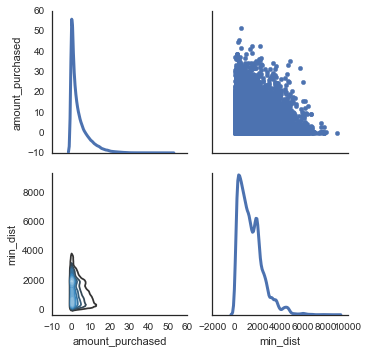

In [156]:
sns.set(style="white")

g = sns.PairGrid(test, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [157]:
test2 = pd.DataFrame({'amount_purchased':clean_df.amount_purchased, 'max_dist':clean_df.max_distance_to_shops})

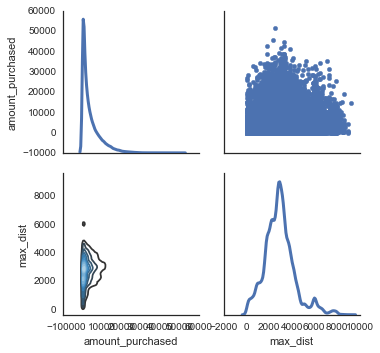

In [158]:
g = sns.PairGrid(test2, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [163]:
test3 = pd.DataFrame({'amount_purchased':clean_df.amount_purchased, 'shops_used':clean_df.shops_used})

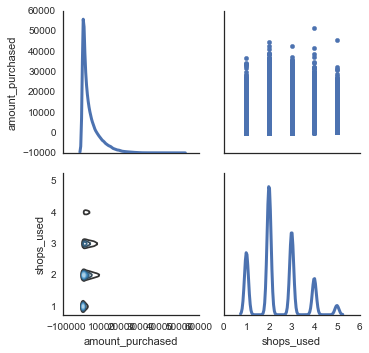

In [167]:
g = sns.PairGrid(test3, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Preliminary Insights: 

1. Shop1 currently has the highest average number of product purchases with highest average unit prices, therefore we can assume that they are making the most revenue compared to the other shops. Shop1 also has the highest number of unique products - intriguing, what products are they selling?

2. Shop2 is used most often.

3. The average distance from customers to the shops is about 2000 m, beyond which purchases decline rapidly, and become more sparse.

4. Shop3 is closest and has relatively low prices - why aren't they making sales?

5. Shop4 is the farthest from customers homes, and though they have lowest prices on average, they have the lowest number of purchases - they may be suffering from their location.


In [170]:
amount_purchased

,n_purch_shop1,n_purch_shop2,n_purch_shop3,n_purch_shop4,n_purch_shop5
0,803.968000,6747.733,0.000,0.000,0.000
1,395.004000,848.526,50.932,0.000,6525.757
2,120.226000,582.939,25.004,0.000,1060.444
3,99.948000,13.442,628.648,0.000,937.482
4,0.000000,2.903,15.019,0.000,0.000
5,1996.825000,4199.332,124.429,0.000,25.799
6,47.157000,0.000,0.000,0.000,0.000
7,95.011000,6577.919,266.427,0.000,0.000
8,7532.674000,9712.388,0.000,0.000,0.000
9,882.567000,7551.109,0.334,0.000,0.000


There are a lot of entries only containing zero! 



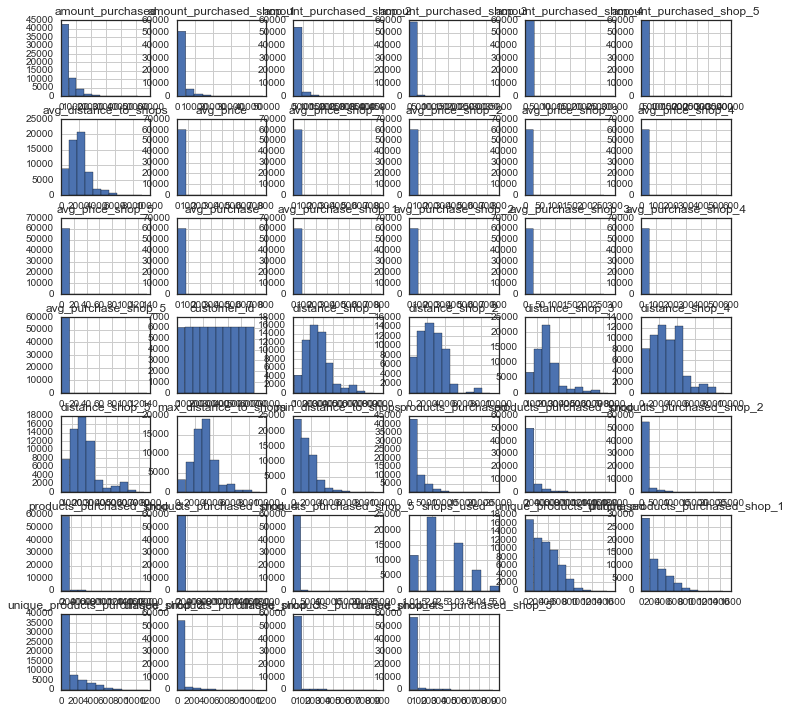

In [181]:
all_clean_data.hist(figsize=(12,12))
plt.show()

# Look at results when zeros are removed:

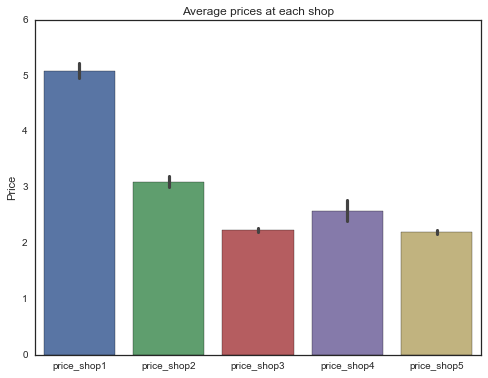

In [184]:


fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=ave_price[ave_price != 0.])
ax.set(ylabel="Price")
sns.plt.title('Average prices at each shop')
plt.show()

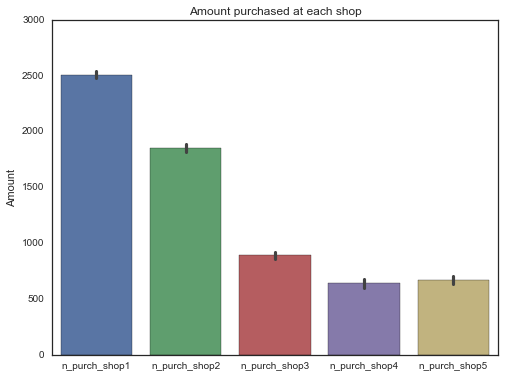

In [185]:
amount_purchased = pd.DataFrame({'n_purch_shop1':all_clean_data.amount_purchased_shop_1, 'n_purch_shop2':all_clean_data.amount_purchased_shop_2, 'n_purch_shop3':all_clean_data.amount_purchased_shop_3, 'n_purch_shop4':all_clean_data.amount_purchased_shop_4, 'n_purch_shop5':all_clean_data.amount_purchased_shop_5})
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=amount_purchased[amount_purchased != 0.])
ax.set(ylabel="Amount")
sns.plt.title('Amount purchased at each shop')
plt.show()

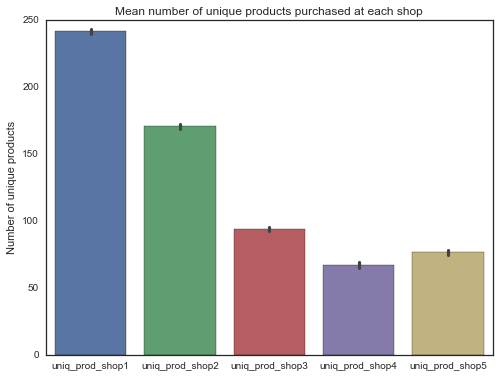

In [186]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=unique_prod_purch[unique_prod_purch != 0.])
ax.set(ylabel="Number of unique products")
sns.plt.title('Mean number of unique products purchased at each shop')
plt.show()

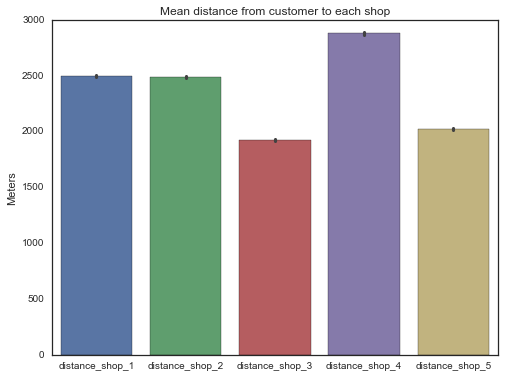

In [187]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=shop_dist[shop_dist != 0.])
ax.set(ylabel="Meters")
sns.plt.title('Mean distance from customer to each shop')
plt.show()

Final Insights: 

1. Shop1 still currently has the highest average number of product purchases with highest average unit prices, therefore we can still assume that they are making the most revenue compared to the other shops. Shop1 also has the highest number of unique products.

2. Shop2 is used most often.

3. The average distance from customers to the shops is about 2000 m, beyond which purchases decline rapidly, and become more sparse.

4. Shop3 is closest and has relatively low prices - why aren't they making sales?

5. Shop4 is the farthest from customers homes with the lowest number of purchases - their prices are not the lowest among the shops, they have the lowest amount of unique items, plus they may be suffering from their location being furthest from customers.